In [2]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [5]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

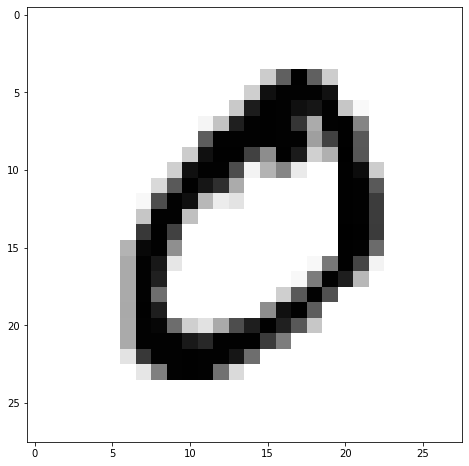

In [12]:
plt.figure(figsize=(8,8))
plt.imshow(X_train[1],cmap='binary')
plt.show()

In [15]:
y_train[1]

0

In [18]:
X_train.shape

(60000, 28, 28)

In [26]:
X_train_flatten=X_train.reshape(len(X_train),28*28)
X_test_flatten=X_test.reshape(len(X_test),28*28)

In [27]:
X_train_flatten.shape,X_test_flatten.shape

((60000, 784), (10000, 784))

In [ ]:
X_train[0]

In [ ]:
X_train_flatten[0]

#### Not added the hidden Layer

In [35]:
## 10 is output classfication count input is X_train_flatten columns
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [38]:
model.fit(X_train_flatten,y_train,epochs=5,batch_size=30)

Epoch 1/5
2000/2000 [==============================] - 5s 2ms/step - loss: 9.7053 - accuracy: 0.8399
Epoch 2/5
2000/2000 [==============================] - 4s 2ms/step - loss: 6.2841 - accuracy: 0.8788
Epoch 3/5
2000/2000 [==============================] - 4s 2ms/step - loss: 5.7863 - accuracy: 0.8820
Epoch 4/5
2000/2000 [==============================] - 3s 2ms/step - loss: 5.6255 - accuracy: 0.8865
Epoch 5/5
2000/2000 [==============================] - 3s 2ms/step - loss: 5.5470 - accuracy: 0.8873


In [39]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.7883 - accuracy: 0.8925


[5.78825569152832, 0.8924999833106995]

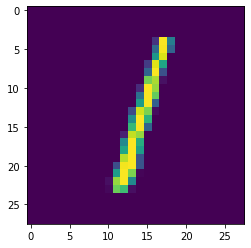

In [51]:
plt.imshow(X_test[2])

In [42]:
result=model.predict(X_test_flatten)

313/313 [==============================] - 0s 1ms/step


In [52]:
y_test[2]

1

In [53]:
result[2]

array([0.0000000e+00, 1.0000000e+00, 9.9997211e-01, 7.9777636e-19,
       0.0000000e+00, 4.6724271e-24, 4.1221261e-25, 0.0000000e+00,
       2.4534692e-03, 1.7441703e-21], dtype=float32)

In [54]:
np.argmax(result[2])

1

In [57]:
y_pred=[np.argmax(i) for i in result]
y_pred[:5]

[2, 2, 1, 0, 2]

In [58]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [61]:
cf=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cf

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    1,    1,    1,    1,    0,    0,    2,    0],
       [   1, 1127,    4,    1,    0,    1,    1,    0,    0,    0],
       [ 197,  336,  493,    3,    3,    0,    0,    0,    0,    0],
       [  95,  215,  437,  260,    0,    3,    0,    0,    0,    0],
       [  87,   47,  383,  151,  313,    0,    0,    0,    1,    0],
       [ 115,   42,  130,  292,   71,  231,    1,    0,    9,    1],
       [ 164,   34,  699,   12,   12,   15,   22,    0,    0,    0],
       [  90,   80,  465,  333,   23,   19,    0,   18,    0,    0],
       [  42,  208,  425,  122,   23,   85,    1,    5,   62,    1],
       [  26,   55,  255,  435,  207,    7,    0,   17,    4,    3]])>

In [62]:
import seaborn as sns

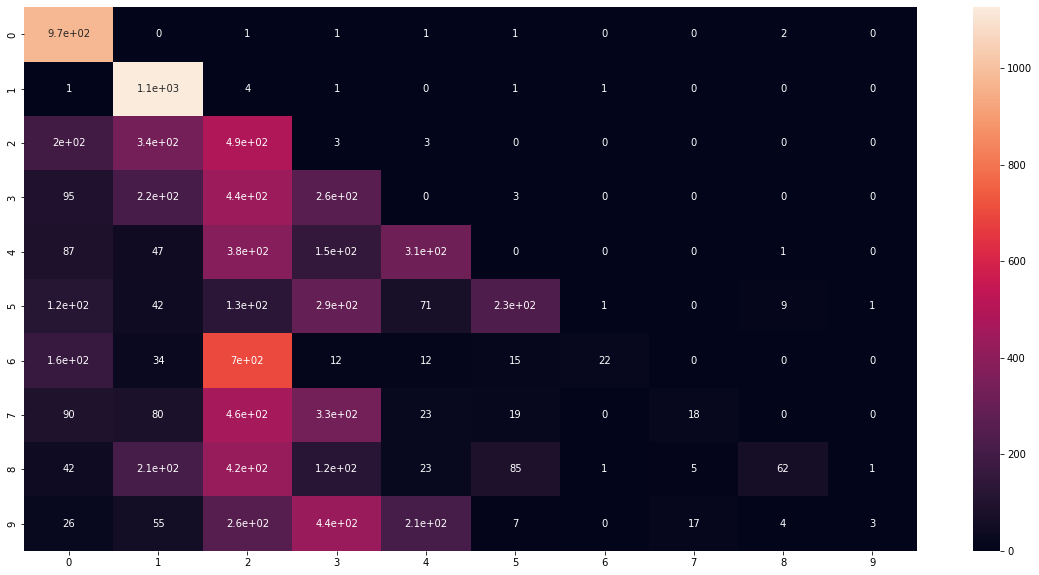

In [66]:
plt.figure(figsize=(20,10))
sns.heatmap(cf,annot=True)
plt.show()

## Add the hidden Layer

In [68]:
## 10 is output classfication count input is X_train_flatten columns
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(X_train_flatten,y_train,epochs=5,batch_size=30)

Epoch 1/5
2000/2000 [==============================] - 10s 4ms/step - loss: 2.6190 - accuracy: 0.8405
Epoch 2/5
2000/2000 [==============================] - 9s 5ms/step - loss: 0.3992 - accuracy: 0.9018
Epoch 3/5
2000/2000 [==============================] - 9s 5ms/step - loss: 0.3053 - accuracy: 0.9212
Epoch 4/5
2000/2000 [==============================] - 9s 4ms/step - loss: 0.2662 - accuracy: 0.9302
Epoch 5/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.2485 - accuracy: 0.9364


In [69]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2762 - accuracy: 0.9306


[0.2761727273464203, 0.9305999875068665]

In [70]:
result=model.predict(X_test_flatten)

313/313 [==============================] - 1s 3ms/step


In [71]:
y_pred=[np.argmax(i) for i in result]
y_pred[:5]

[1, 0, 1, 0, 0]

In [72]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [73]:
cf=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cf

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[962,   0,   0,   1,   0,   0,   4,   0,  12,   1],
       [255, 850,   2,   4,   0,   1,   0,   0,  22,   1],
       [932,  37,  34,   4,   0,   1,   4,   1,  15,   4],
       [305, 490,  62, 128,   1,   0,   1,   2,  17,   4],
       [803,  79,   5,   4,  52,   0,   6,   0,  19,  14],
       [599,  39,  81,  55,   3,  70,   5,   1,  32,   7],
       [338,  96,   3,   2,   3,  92, 386,   0,  38,   0],
       [202, 713,  78,   8,   1,   1,   0,  11,   7,   7],
       [ 24,  31,   0,  10,   2,  10,   0,   0, 887,  10],
       [780, 129,   4,  32,   8,   0,   0,   0,  19,  37]])>

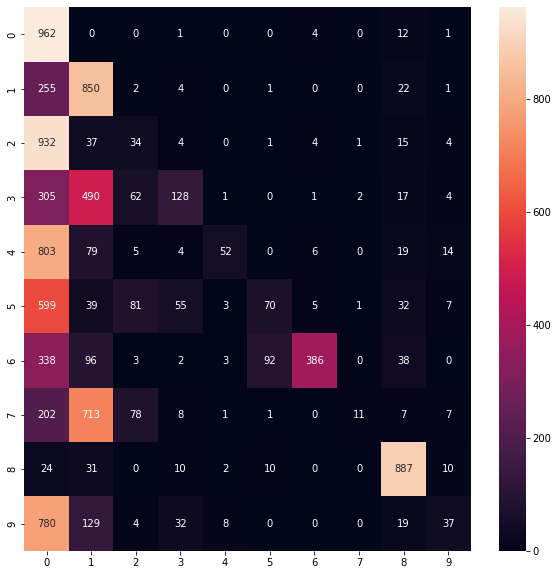

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(cf,annot=True,fmt='d')
plt.show()

## Flatten layer without changeing the reshape

In [81]:
## Flatten layer without changeing the reshape
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5,batch_size=30)

Epoch 1/5
2000/2000 [==============================] - 10s 4ms/step - loss: 1.8591 - accuracy: 0.8073
Epoch 2/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.3787 - accuracy: 0.9004
Epoch 3/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.2754 - accuracy: 0.9255
Epoch 4/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.2515 - accuracy: 0.9327
Epoch 5/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.2307 - accuracy: 0.9391


In [82]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5,batch_size=30)

Epoch 1/5
2000/2000 [==============================] - 10s 4ms/step - loss: 1.3228 - accuracy: 0.7687
Epoch 2/5
2000/2000 [==============================] - 9s 4ms/step - loss: 0.3725 - accuracy: 0.9006
Epoch 3/5
2000/2000 [==============================] - 9s 4ms/step - loss: 0.2427 - accuracy: 0.9341
Epoch 4/5
2000/2000 [==============================] - 9s 4ms/step - loss: 0.1913 - accuracy: 0.9485
Epoch 5/5
2000/2000 [==============================] - 9s 4ms/step - loss: 0.1614 - accuracy: 0.9567


In [83]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.5984 - accuracy: 0.8568
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3035 - accuracy: 0.9237
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2225 - accuracy: 0.9409
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1853 - accuracy: 0.9496
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1520 - accuracy: 0.9567
